In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from datetime import date

In [ ]:
end = date.today()
end

datetime.date(2023, 4, 12)

In [ ]:
start = '2010-01-01'
end = date.today()

df = yf.download('TSLA', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800
2023-04-05,190.520004,190.679993,183.759995,185.520004,185.520004,133882500
2023-04-06,183.080002,186.389999,179.740005,185.059998,185.059998,123857900
2023-04-10,179.940002,185.100006,176.110001,184.509995,184.509995,142154600
2023-04-11,186.690002,189.190002,185.649994,186.789993,186.789993,115557400


In [ ]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


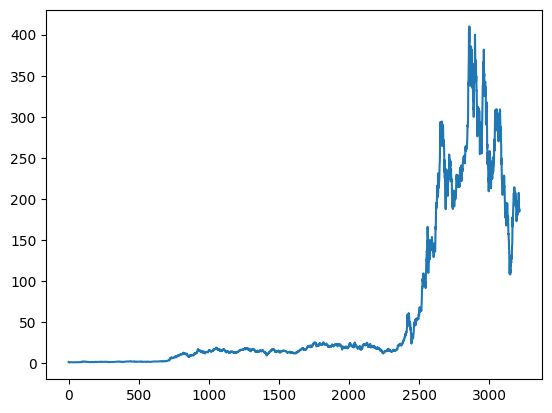

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3213,197.320007,198.740005,190.320007,192.580002,126463800
3214,190.520004,190.679993,183.759995,185.520004,133882500
3215,183.080002,186.389999,179.740005,185.059998,123857900
3216,179.940002,185.100006,176.110001,184.509995,142154600


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3213    171.7762
3214    171.8555
3215    171.7989
3216    171.6843
3217    171.6427
Name: Close, Length: 3218, dtype: float64

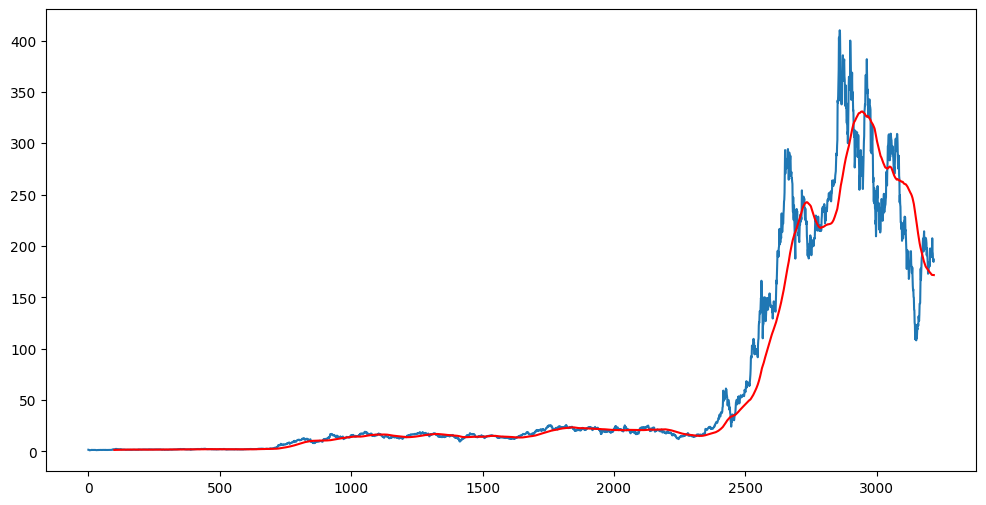

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3213    215.530684
3214    215.374484
3215    215.114600
3216    214.856717
3217    214.615317
Name: Close, Length: 3218, dtype: float64

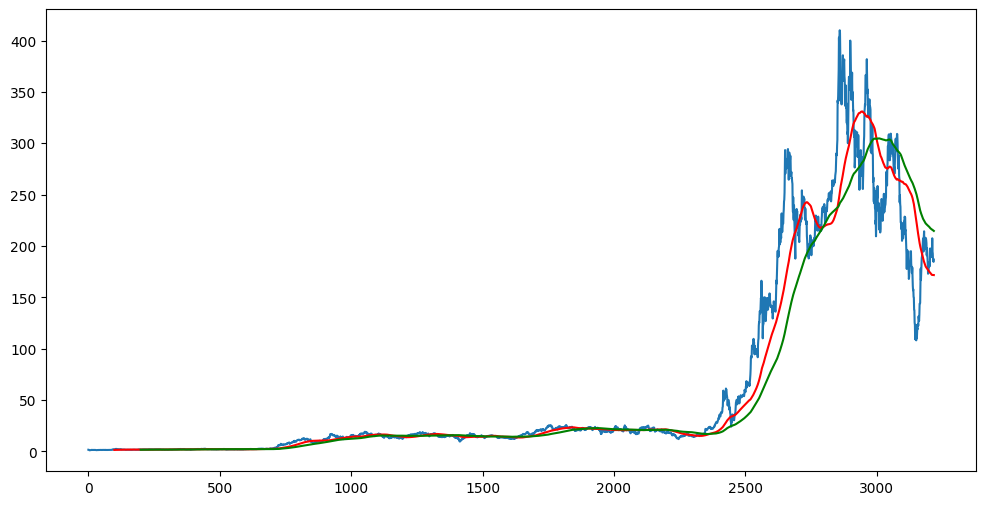

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(3218, 5)

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2252, 1)
(966, 1)


In [ ]:
data_training.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [ ]:
data_testing.head()

,Close
2252,14.473333
2253,13.950667
2254,14.260667
2255,14.328000
2256,15.002000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.51503246],
       [0.51110507],
       [0.53380281]])

In [ ]:
data_training_array.shape

(2252, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2152, 100, 1)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
68/68 [==============================] - 43s 508ms/step - loss: 0.0457
Epoch 2/50
68/68 [==============================] - 22s 331ms/step - loss: 0.0113
Epoch 3/50
68/68 [==============================] - 21s 315ms/step - loss: 0.0111
Epoch 4/50
68/68 [==============================] - 22s 327ms/step - loss: 0.0090
Epoch 5/50
68/68 [==============================] - 22s 330ms/step - loss: 0.0087
Epoch 6/50
68/68 [==============================] - 22s 331ms/step - loss: 0.0089
Epoch 7/50
68/68 [==============================] - 23s 332ms/step - loss: 0.0075
Epoch 8/50
68/68 [==============================] - 22s 330ms/step - loss: 0.0079
Epoch 9/50
68/68 [==============================] - 22s 325ms/step - loss: 0.0081
Epoch 10/50
68/68 [==============================] - 22s 320ms/step - loss: 0.0067
Epoch 11/50
68/68 [==============================] - 23s 332ms/step - loss: 0.0068
Epoch 12/50
68/68 [==============================] - 23s 332ms/step - loss: 0.0065
Epoch 13/50
6

In [ ]:
model.save('STP_model.h5')

In [ ]:
data_testing.head()

,Close
2252,14.473333
2253,13.950667
2254,14.260667
2255,14.328000
2256,15.002000


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_training, ignore_index=True)

<ipython-input-34-9112874437a9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_training, ignore_index=True)


In [ ]:
final_df.head()

,Close
0,23.070000
1,23.153999
2,20.150667
3,19.927999
4,19.172667


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.89450157],
       [0.89791434],
       [0.77589381],
       ...,
       [0.51503246],
       [0.51110507],
       [0.53380281]])

In [ ]:
input_data.shape

(2352, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2252, 100, 1)
(2252,)


In [ ]:
y_predicted = model.predict(x_test)

71/71 [==============================] - 8s 101ms/step


In [ ]:
y_predicted.shape

(2252, 1)

In [ ]:
y_test

array([0.02191227, 0.02174975, 0.01668473, ..., 0.51503246, 0.51110507,
       0.53380281])

In [ ]:
y_predicted

array([[0.45765358],
       [0.46423256],
       [0.4641301 ],
       ...,
       [0.440101  ],
       [0.4404062 ],
       [0.4462695 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.04062838])

In [ ]:
scale_factor = 1/0.04062838
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

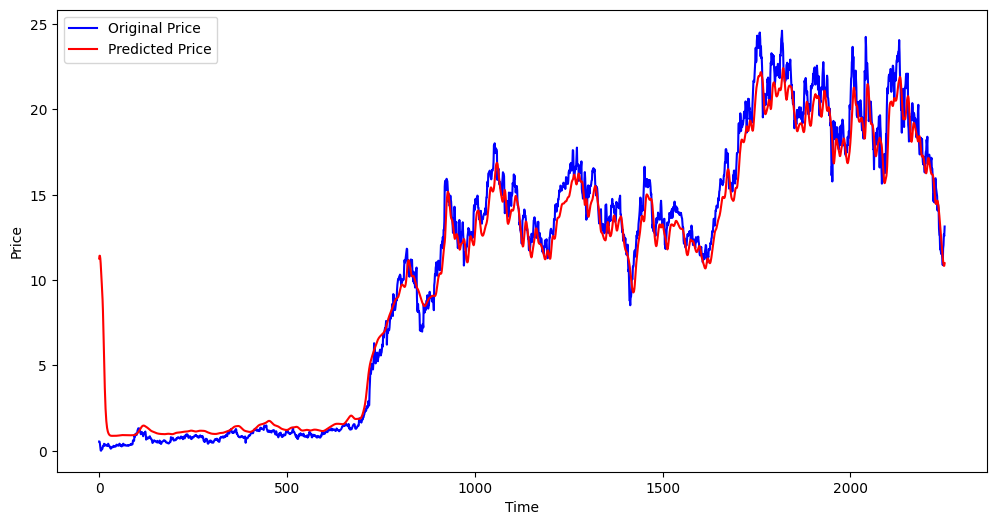

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()